In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('countries.csv', sep=';')
df.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [3]:
df.shape

(252, 19)

When we see in a pandas dataframe the **NaN** value, we can say that value is null. In order to detect how many values per column are null, we use `isnull()` function and then `sum()`

In [4]:
print(df.isnull().sum())

alpha_2                  1
alpha_3                  0
area                     0
capital                  6
continent               42
currency_code            1
currency_name            1
eqivalent_fips_code    251
fips                     3
geoname_id               0
languages                3
name                     0
neighbours              87
numeric                  0
phone                    5
population               0
postal_code_format      98
postal_code_regex      100
tld                      2
dtype: int64


As we can see in column `eqivalent_fips_code`, in this way we notice which columns do not bring us anything, and therefore good candidates for deletion. But columns like `languages` can easily be cleaned without much trouble.

When we are taking the decision on whether or not we delete an attribute **based on the amount of null data**, we consider the following:

- Statistically, we do not delete a column if the 60% of all its values can be taken as valuable, or not-null. For example, if a column with 100 values has 40 null values, there are techniques with which we either take out those values (zero), or using the mean of the other 60 values we can fill the nulled 40, in order to **keep them and process them**.

- When we supass the 60% rule, we can test some algorithms to see if that attribute is helping or if we can just delete it.

When we say **clean the null values** we either mean to zero it or leave it as `''` (empty string): basically, make the null values as if it were no value or nothing, in order not to count it in the processing (the non-null value is the one used in the processing); or we can compute the mean of the non-null data and put a mean value in all the values that are null. If we decide to delete it, we need to delete the complete row. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

With `info()` function we can see which columns can be processed: only the numeric columns, where the **NaN** are not taken on account. If we have a DB with many categorical variables (string values), you can transform it into numerical columns so that they can be processed.

In [6]:
df.describe() # only for numeric attributes

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


Text(0.5, 1.0, 'Correlation Matrix')

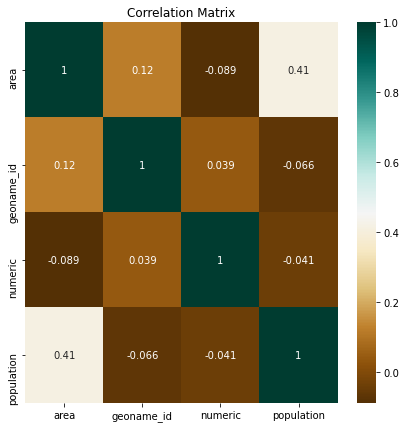

In [7]:
correlation = df.corr()
plt.figure(figsize=(7,7))
ax = sns.heatmap(correlation, annot=True, cmap='BrBG')
plt.title('Correlation Matrix')

A direct way of deleting null values is to set them as `''` (empty or blank). After this, we can see with `isnull()` that there are no more **NaN** detected values.

In [8]:
df_clean = df.replace(np.nan, '')
print(df_clean.isnull().sum())
df_clean

alpha_2                0
alpha_3                0
area                   0
capital                0
continent              0
currency_code          0
currency_name          0
eqivalent_fips_code    0
fips                   0
geoname_id             0
languages              0
name                   0
neighbours             0
numeric                0
phone                  0
population             0
postal_code_format     0
postal_code_regex      0
tld                    0
dtype: int64


,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,,,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,,,.af
3,AG,ATG,443.0,St. John's,,XCD,Dollar,,AC,3576396,en-AG,Antigua and Barbuda,,28,+1-268,86754,,,.ag
4,AI,AIA,102.0,The Valley,,XCD,Dollar,,AV,3573511,en-AI,Anguilla,,660,+1-264,13254,,,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,,,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


- Filter all countries that speak spanish (es):
    
    - `df_clean['languages'].str.contains('es')` applies to all elements of df_clean['languages'] the contains func and returns a list of such rows that contain 'es' and then apply (assign) such list to df_clean.

In [9]:
df_es_lang = df_clean[df_clean['languages'].str.contains('es')]
df_es_lang.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz


- Plot as a bar the population in each country where spanish is spoken (`alpha_3` is the country abreviation):

<AxesSubplot:xlabel='alpha_3'>

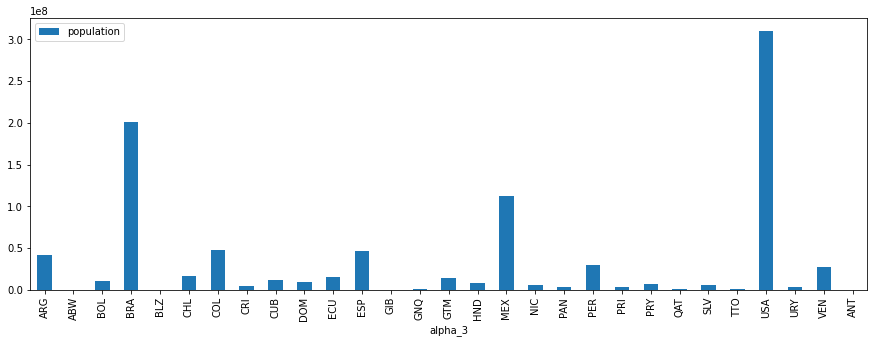

In [10]:
df_es_lang.set_index('alpha_3')[['population']].plot(kind='bar', figsize=(15,5))

<AxesSubplot:xlabel='continent'>

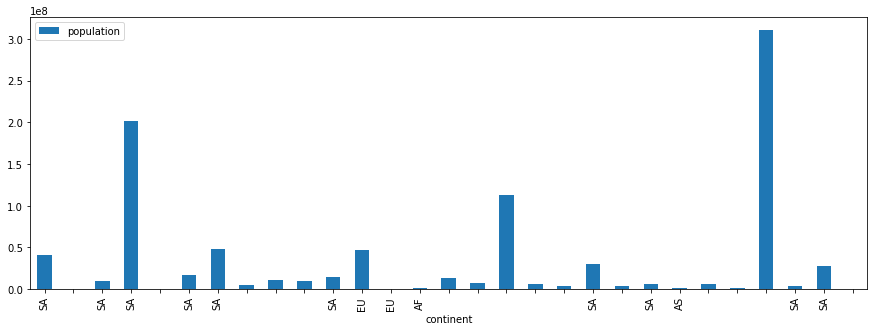

In [11]:
df_es_lang.set_index('continent')[['population']].plot(kind='bar', figsize=(15,5))

In [12]:
df_es_lang.set_index('alpha_3')

,alpha_2,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
alpha_3,,,,,,,,,,,,,,,,,,
ARG,AR,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
ABW,AW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
BOL,BO,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
BRA,BR,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
BLZ,BZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
CHL,CL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
COL,CO,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
CRI,CR,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
CUB,CU,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu


In [13]:
df_pop = pd.read_csv('countries2.csv')
df_pop_es = df_pop[df_pop['country']=='Spain']
df_pop_es

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161
1421,Spain,1977,36439000
1422,Spain,1982,37983310
1423,Spain,1987,38880702
1424,Spain,1992,39549438
1425,Spain,1997,39855442


<AxesSubplot:xlabel='year'>

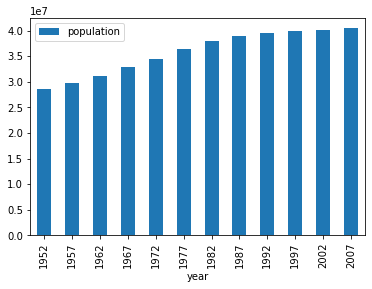

In [14]:
df_pop_es[['year', 'population']].plot(x='year', kind='bar')

In [15]:
type(df_pop_es[['year', 'population']])

pandas.core.frame.DataFrame

In [16]:
df_pop_ar = df_pop[(df_pop['country']=='Argentina')]
df_pop_ar

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799
53,Argentina,1977,26983828
54,Argentina,1982,29341374
55,Argentina,1987,31620918
56,Argentina,1992,33958947
57,Argentina,1997,36203463


In [17]:
df_pop_es

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161
1421,Spain,1977,36439000
1422,Spain,1982,37983310
1423,Spain,1987,38880702
1424,Spain,1992,39549438
1425,Spain,1997,39855442


<AxesSubplot:xlabel='year'>

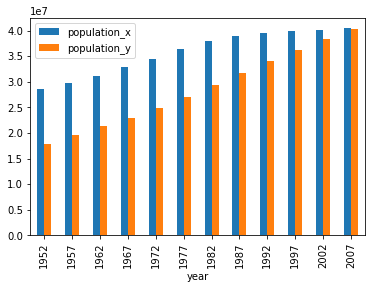

In [18]:
df_bars = pd.merge(df_pop_es, df_pop_ar, on='year')
df_bars.plot(x='year', kind='bar')

<AxesSubplot:xlabel='year'>

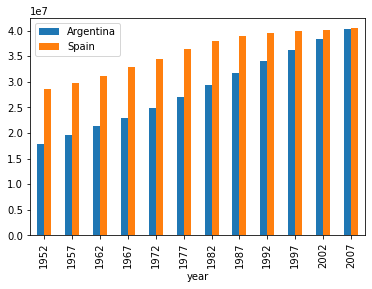

In [19]:
df_pop_ar = df_pop[df_pop['country'] == 'Argentina']
years = df_pop_es['year']

pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

df_plot = pd.DataFrame({'Argentina':pop_ar, 'Spain':pop_es}, index=years)
df_plot.plot(kind='bar')

# Data Transformation

Types:

## 1. Scaling

Transform the data (numeric attributes) into ranges that we need to use for a particular problem: (0 - 1), (0 - 10), etc. because every attribute has a range or scale different from the others.

## 2. Standarization

Is the standard deviation of the data with respect to the mean in zero, where we have the std dev as a positive or negative value.

## 3. Normalization

### 1. Scaling

When we are doing pre-processing analysis for a classification problem, we need to separate the different parts of the db: the data (1) that represents what is a class (2). This db is a problem of classification where we have attributes with certain values that correspond to two different classes. For pre-processing, it is recommended that we separate the data from the class column, so that we operate only on what we have as data. Later on, we can resum using the class column when we are at the stage of using a ML algorithm.

In [24]:
names = ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi', 'age', 'class']
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data = pd.read_csv(url, names=names)
array = data.values
x = array[:,0:8] # take out class column
y = array[:,8] # class column as a 1D list of 1s and 0s
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [21]:
!pip install sklearn

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0,1)) # giving the range to where we want to scale: the values of the attributes
# will be scaled to range between 0 and 1
np.set_printoptions(precision=3)
rescaledX = scaler.fit_transform(x) # variable to apply the transformation: fit_transform applies the scale transf to x
rescaledX # here now we have the values within 0-1 with respect to each column limits

array([[0.353, 0.744, 0.59 , ..., 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, ..., 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, ..., 0.347, 0.254, 0.183],
       ...,
       [0.294, 0.608, 0.59 , ..., 0.39 , 0.071, 0.15 ],
       [0.059, 0.633, 0.492, ..., 0.449, 0.116, 0.433],
       [0.059, 0.467, 0.574, ..., 0.453, 0.101, 0.033]])

This scaling from 0 to 1 is not the same as normalization because the scaling scales each column values to 0-1 depending on each column's **min** and **max** values, whereas normalization uses row limits and square differences. sci-kit learn package uses Normalization through L2 method.